In [3]:
import glob, tonic, pickle, sys, os
import matplotlib.pyplot as plt
import numpy as np
from hots.utils import make_histogram_classification, HOTS_Dataset
import hots.network as network
%cd '../hots'
import network
#sys.path.append('hots/network'); import hots.network as network

#record_path = '/envau/work/neopto/USERS/GRIMALDI/HOTS/hotsline/Records/'
record_path = '../Records/'

type_transform = tonic.transforms.NumpyAsType(int)
trainset = tonic.datasets.DVSGesture(save_to='../../Data/', train=True, transform=type_transform)
testset = tonic.datasets.DVSGesture(save_to='../../Data/', train=False, transform=type_transform)

/home/antoine/homhots/hotsline/hots


In [58]:
list_files_train = glob.glob(record_path+'output/train/2023-01-04*gesture*')
print(list_files_train)

['../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32]_[4000.0, 32000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32]_[20000.0, 160000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32, 64]_[3000.0, 24000.0, 48000.0]_[4, 8, 16]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[32, 16]_[20000.0, 320000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[32, 16]_[3000.0, 48000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32]_[60000.0, 480000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[64, 16]_[4000.0, 128000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[64, 16]_[12000.0, 384000.0]_[4, 8]_209_(None, None)', '../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32]_[3000.0, 

In [5]:
list_files_network = glob.glob(record_path+'networks/2023-01-04*gesture*')
for i in range(len(list_files_network)):
    os.system('scp -r "%s" antoine@10.164.6.114:~/homhots/hotsline/Records/networks/' % (list_files_network[i]))

../Records/output/test/2023-01-04_gesture_homeohots_True_[16, 32]_[4000.0, 32000.0]_[4, 8]_44_(None, None) ../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32]_[4000.0, 32000.0]_[4, 8]_209_(None, None)
44 209
0.6590909090909091
../Records/output/test/2023-01-04_gesture_homeohots_True_[16, 32]_[20000.0, 160000.0]_[4, 8]_44_(None, None) ../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32]_[20000.0, 160000.0]_[4, 8]_209_(None, None)
44 209
0.5454545454545454
../Records/output/test/2023-01-04_gesture_homeohots_True_[16, 32, 64]_[3000.0, 24000.0, 48000.0]_[4, 8, 16]_44_(None, None) ../Records/output/train/2023-01-04_gesture_homeohots_True_[16, 32, 64]_[3000.0, 24000.0, 48000.0]_[4, 8, 16]_209_(None, None)
40 190
0.175
../Records/output/test/2023-01-04_gesture_homeohots_True_[32, 16]_[20000.0, 320000.0]_[4, 8]_44_(None, None) ../Records/output/train/2023-01-04_gesture_homeohots_True_[32, 16]_[20000.0, 320000.0]_[4, 8]_209_(None, None)
44 209
0.6590909090909091
../

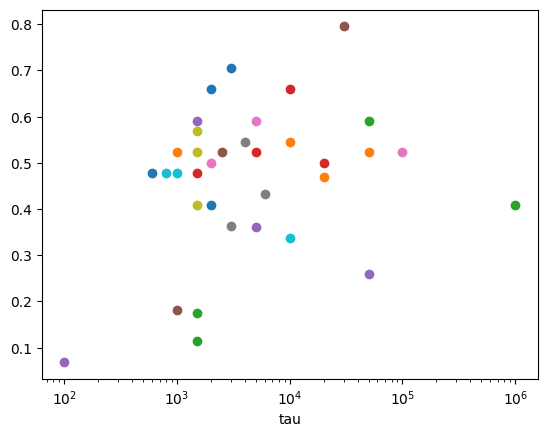

In [27]:
scores, parameters = [], []

for index, train_path in enumerate(list_files_train):
    name = train_path[24:]
    test_name = name.replace('209', '44')
    test_path = record_path+'output/test/'+test_name
    network_path = record_path+'networks/'+test_name[:test_name.index('_44_')]+'.pkl'
    
    with open(network_path, 'rb') as file:
        hots = pickle.load(file)
    
    N_neuron_end = int(float(train_path[train_path.index(']')-2:train_path.index(']')]))
    print(test_path, train_path)

    testset_output = HOTS_Dataset(test_path, testset.sensor_size, testset.classes, transform=type_transform, dtype=trainset.dtype)
    trainset_output = HOTS_Dataset(train_path, trainset.sensor_size, trainset.classes, transform=type_transform, dtype=trainset.dtype)
    print(len(testset_output),len(trainset_output))
    #print(testset_output.classes, trainset_output.classes)

    score = make_histogram_classification(trainset_output, testset_output, N_neuron_end) 
    print(score)
    scores.append(score)
    
    parameters.append([len(hots.layers), hots.R, hots.tau, [len(hots.layers[n].cumhisto) for n in range(len(hots.layers))]])

for i in range(len(scores)):
    plt.semilogx(parameters[i][2][0]/2, scores[i], 'o')
    plt.xlabel('tau')

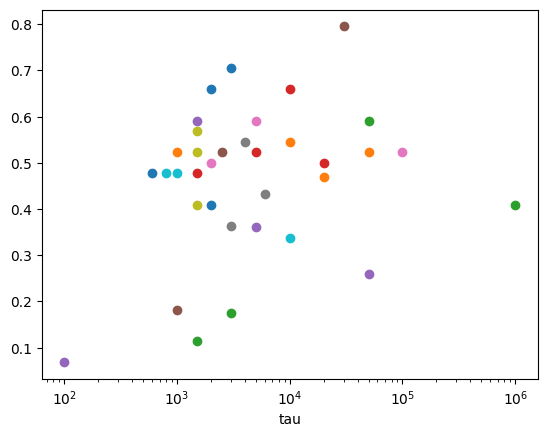

In [48]:
for i in range(len(scores)):
    plt.semilogx(parameters[i][2][-1]/parameters[i][3][0], scores[i], 'o')
    plt.xlabel('tau')

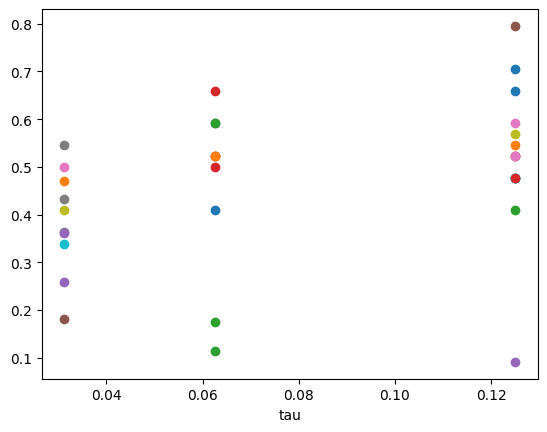

In [43]:
for i in range(len(scores)):
    plt.plot(parameters[i][2][0]/parameters[i][2][-1], scores[i], 'o')
    plt.xlabel('tau')

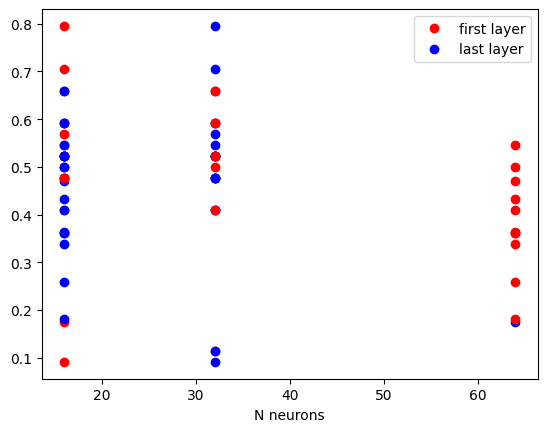

In [40]:
for i in range(len(scores)):
    plt.plot(parameters[i][3][0], scores[i], 'r o')
    plt.plot(parameters[i][3][-1], scores[i], 'b o')
plt.plot(parameters[i][3][0], scores[i], 'r o', label='first layer')
plt.plot(parameters[i][3][-1], scores[i], 'b o', label='last layer')
plt.xlabel('N neurons')
plt.legend()

16 32
16 32
16 64
32 16
32 16
16 32
64 16
64 16
16 32
64 16
16 32
16 32
32 32
32 16
16 32
16 32
16 32
64 16
32 16
16 32
16 32
64 16
16 32
32 16
64 16
64 16
16 32
64 16
64 32
16 32
32 16
32 16
32 16
16 32
64 16


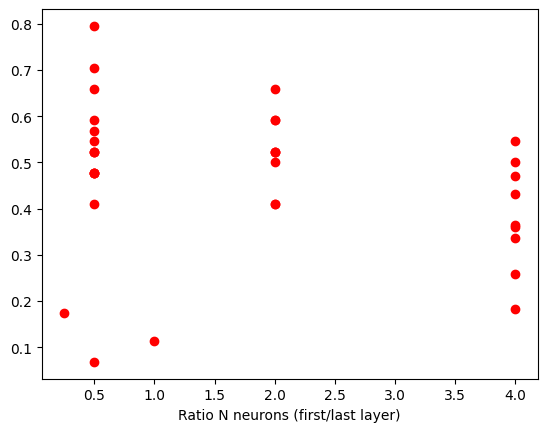

In [60]:
for i in range(len(scores)):
    print(parameters[i][3][0], parameters[i][3][-1])
    plt.plot(parameters[i][3][0]/parameters[i][3][-1], scores[i], 'r o')
    plt.xlabel('Ratio N neurons (first/last layer)')

In [2]:
list_files_pkl = glob.glob(record_path+'LR_results/*gesture*.pkl')
list_files_npz = glob.glob(record_path+'LR_results/*gesture*.npz')

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_500000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


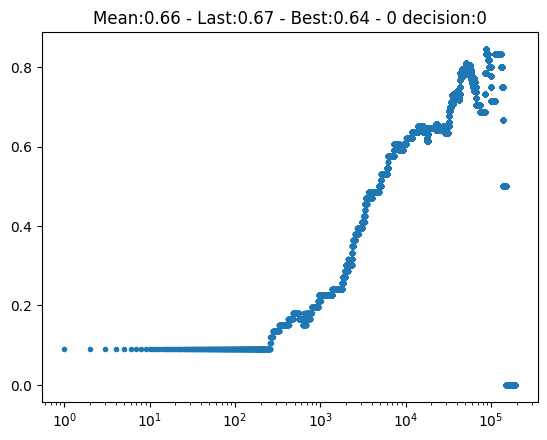

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_50000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


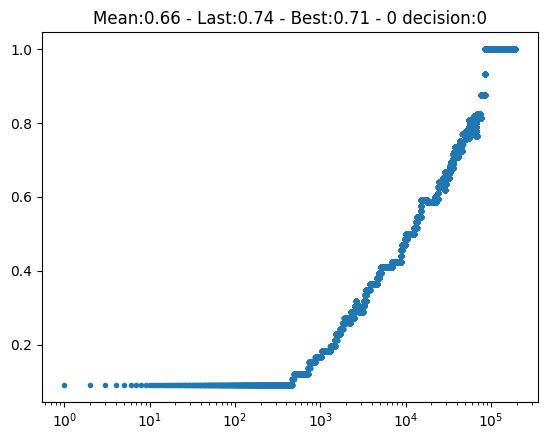

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_96000.0_0.0001_(0.9, 0.999)_65_0.9_(None, None)_onlinac_0.9.npz


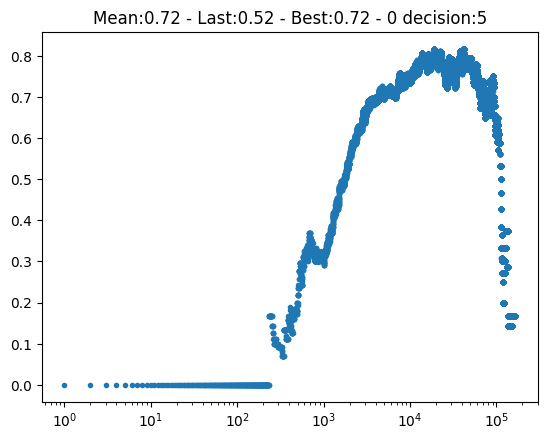

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_300000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


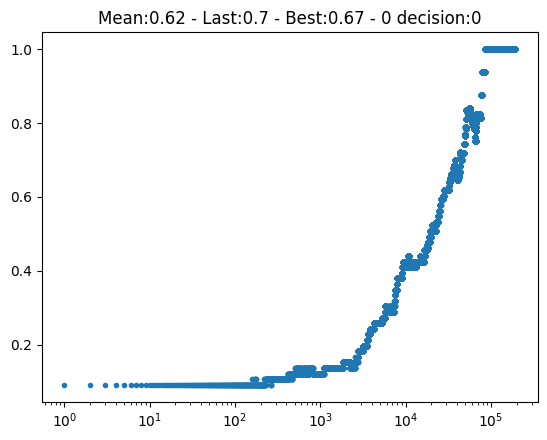

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_320000.0_0.0001_(0.9, 0.999)_33_0.95_(None, None)_onlinac_None.npz


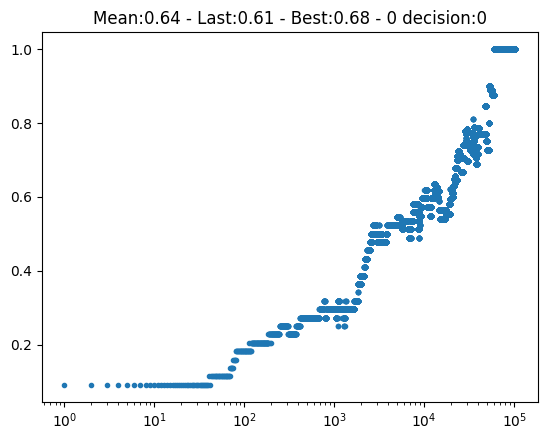

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_100000000.0_0.0001_(0.9, 0.999)_257_0.99_(None, None)_onlinac_0.9.npz


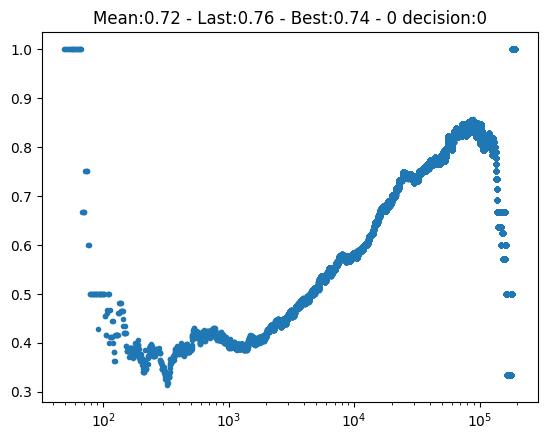

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_100000000.0_0.0001_(0.9, 0.999)_257_0.99_(None, None)_onlinac_None.npz


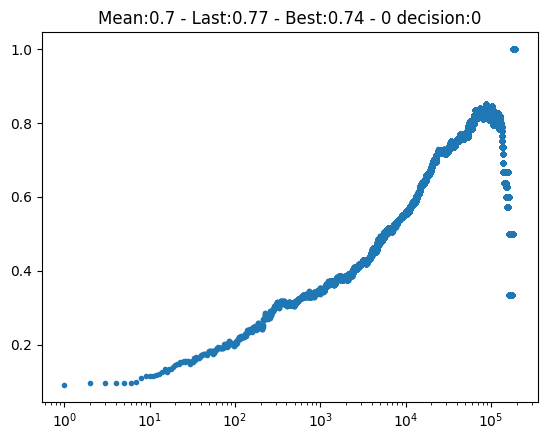

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_1000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


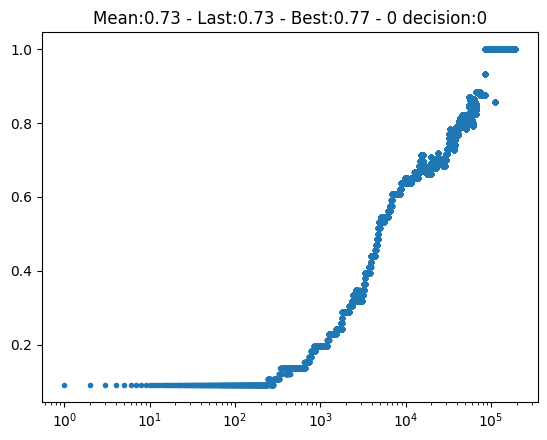

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_96000.0_0.0001_(0.9, 0.999)_33_0.95_(None, None)_onlinac_None.npz


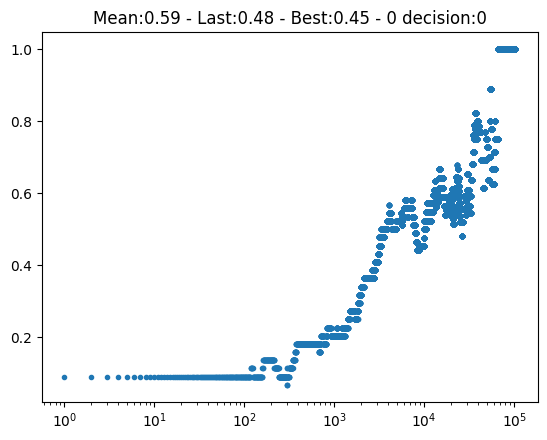

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_reduce_eventcount_100000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


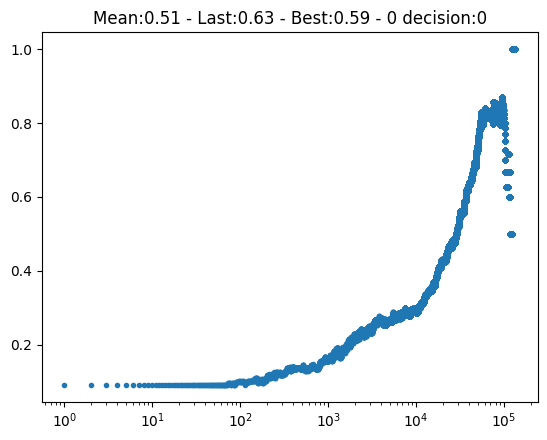

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_100000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


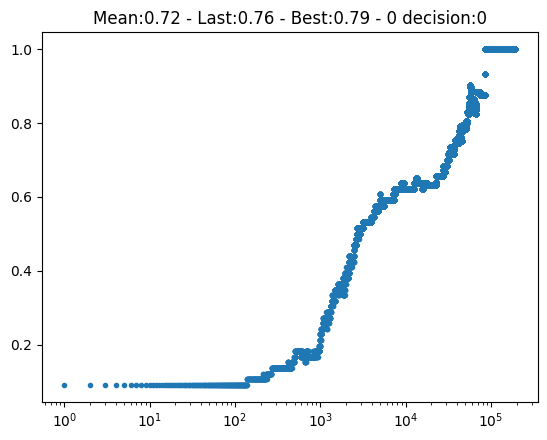

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_fovea_linear_100000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


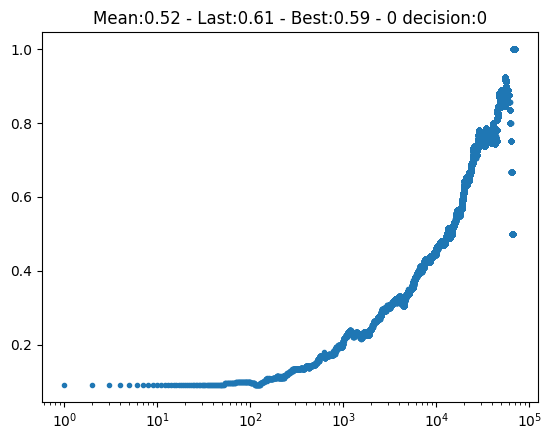

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_32000.0_0.0001_(0.9, 0.999)_33_0.95_(None, None)_onlinac_None.npz


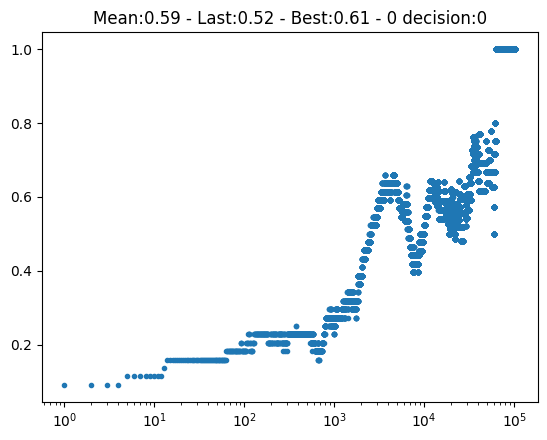

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000.0_0.0001_(0.9, 0.999)_129_0.95_(None, None)_onlinac_0.9.npz


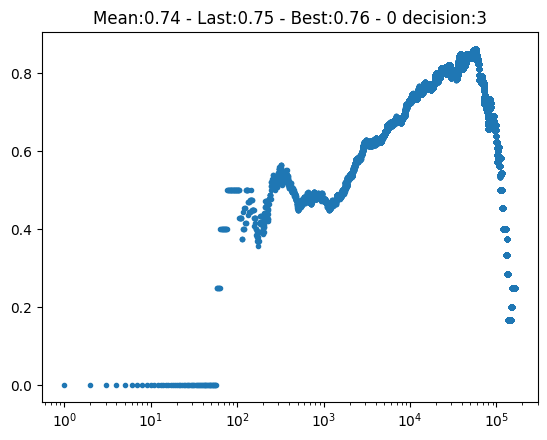

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_500000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


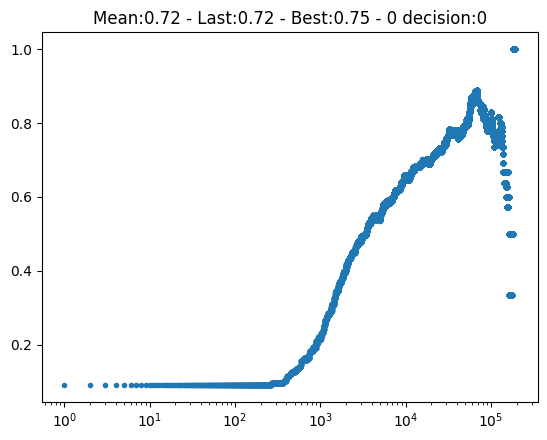

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000.0_0.0001_(0.9, 0.999)_33_0.95_(None, None)_onlinac_None.npz


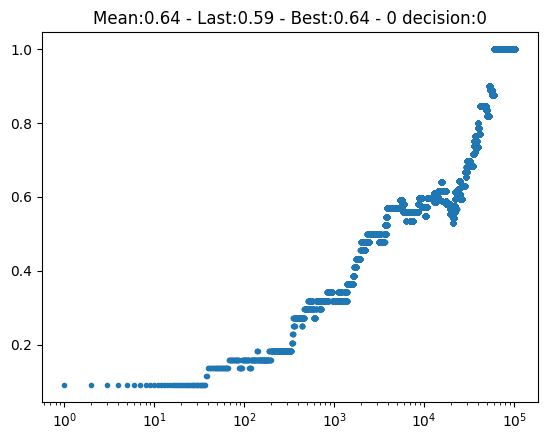

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000000_0.0001_(0.9, 0.999)_15_0.95_(None, None)_onlinac_None.npz


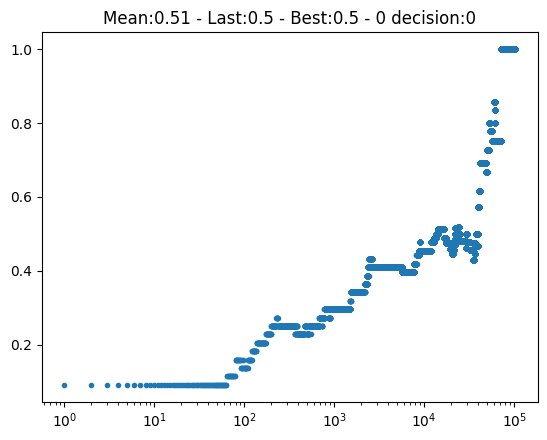

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_5000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


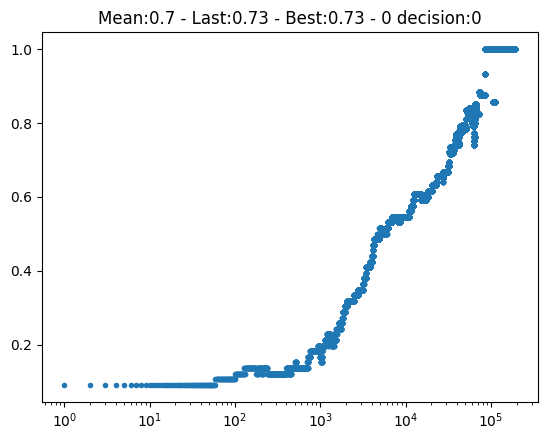

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000_0.0001_(0.9, 0.999)_15_0.95_(None, None)_onlinac_None.npz


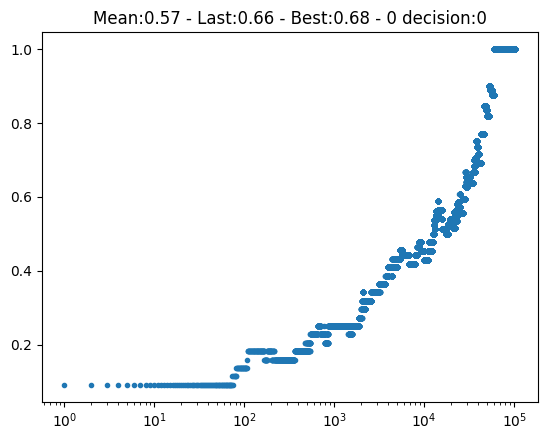

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_10000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


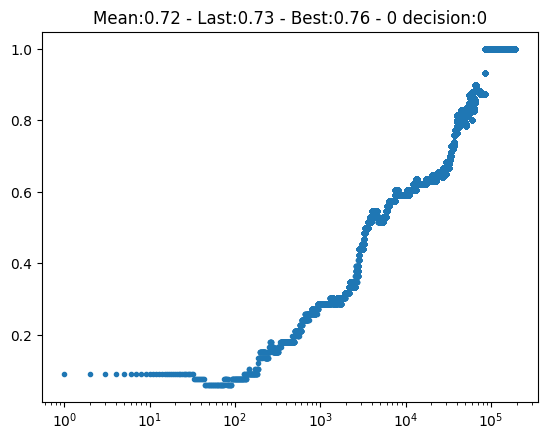

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_200000000.0_0.0001_(0.9, 0.999)_33_0.9_(None, None)_onlinac_None.npz


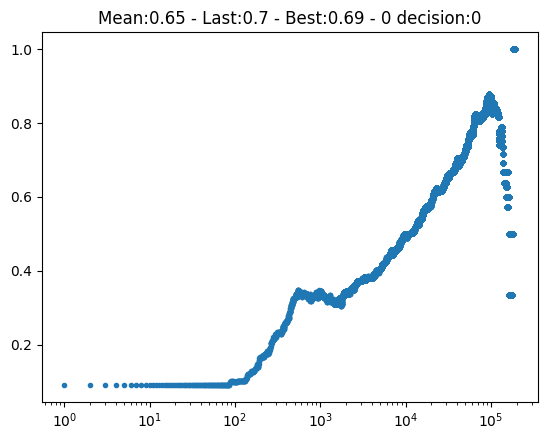

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_9600000000_0.0001_(0.9, 0.999)_15_0.95_(None, None)_onlinac_None.npz


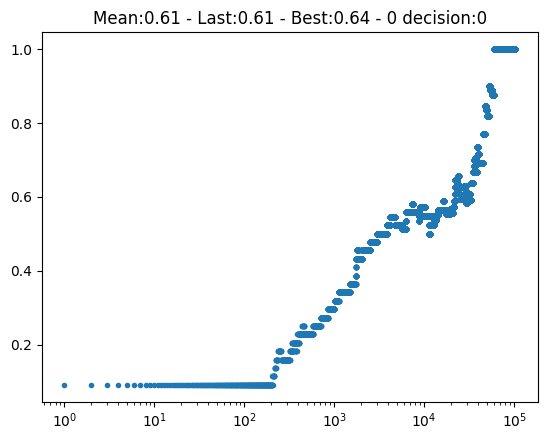

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_640000.0_0.0001_(0.9, 0.999)_33_0.95_(None, None)_onlinac_None.npz


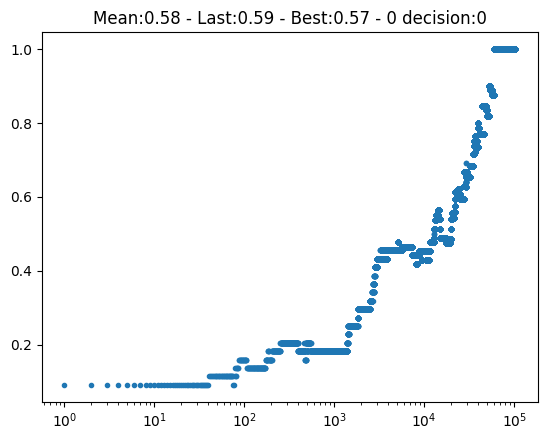

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_96000.0_0.0001_(0.9, 0.999)_65_0.9_(None, None)_onlinac_None.npz


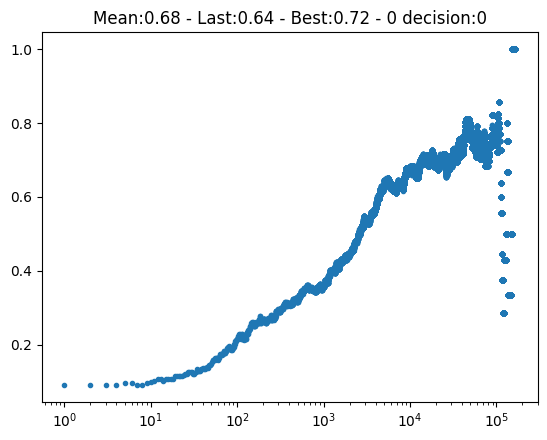

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000.0_0.0001_(0.9, 0.999)_129_0.95_(None, None)_onlinac_None.npz


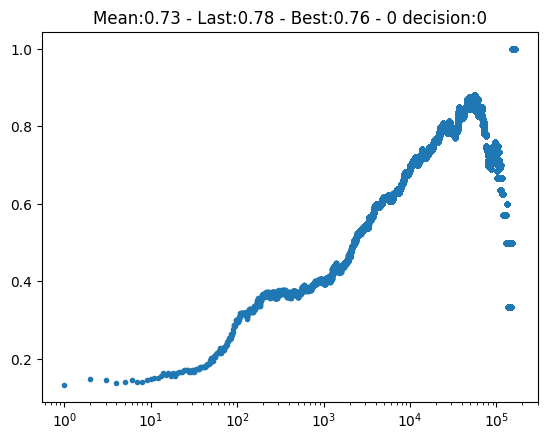

../Records/LR_results/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_96000000_0.0001_(0.9, 0.999)_15_0.95_(None, None)_onlinac_None.npz


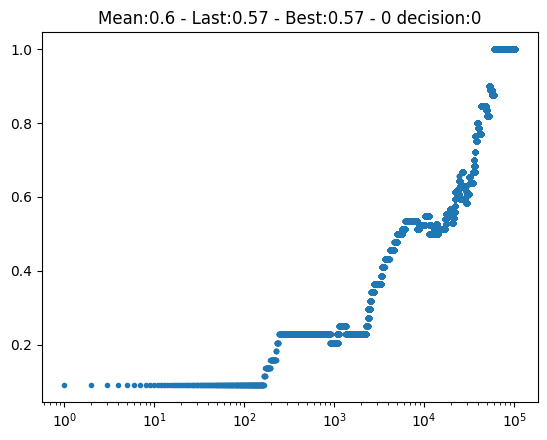

../Records/LR_results/2022-04-22_gesture_homeohots_True_[16, 32]_[100000.0, 800000.0]_[4, 8]_fovea_cubic_100000000.0_0.0001_(0.9, 0.999)_11_0.99_(None, None)_onlinac_None.npz


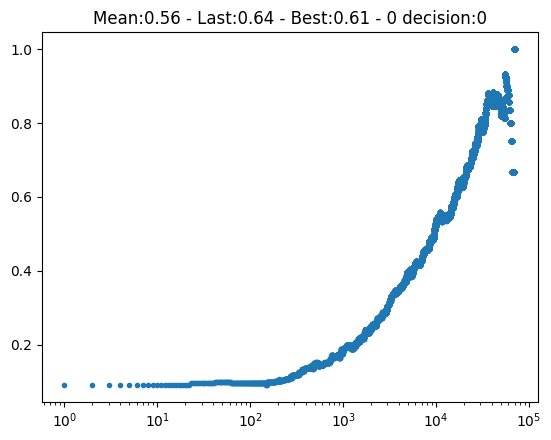

In [3]:
for file in list_files_npz:
    data_stored = np.load(file)
    meanac = data_stored['arr_0']
    onlinac = data_stored['arr_1']
    lastac = data_stored['arr_2']
    best_probability = data_stored['arr_3']
    percentile_90 = data_stored['arr_4']
    nb_no_decision = data_stored['arr_5']
    if meanac>0.5:
        plt.semilogx(onlinac,'.')
        print(file)
        plt.title(f'Mean:{np.round(meanac,2)} - Last:{np.round(lastac,2)} - Best:{np.round(best_probability,2)} - 0 decision:{np.round(nb_no_decision,2)}')
        plt.show()

In [4]:
name = 'homeohots'
homeo = True
#timestr = '2022-04-22'
timestr = '2022-10-12'
dataset_name = 'gesture'

Rz = [4, 8]
N_neuronz = [16, 32]
#tauz = [3e4*2, 3e4*16]
tauz = [3e3*2, 3e3*16]

hots = network(name, dataset_name, timestr, trainset.sensor_size, nb_neurons = N_neuronz, tau = tauz, R = Rz, homeo = homeo, record_path=record_path)

initial_name = hots.name

name_nohomeo = 'hots'
hots_nohomeo = network(name, dataset_name, timestr, trainset.sensor_size, nb_neurons = N_neuronz, tau = tauz, R = Rz, homeo = False, record_path=record_path)

initial_name_nohomeo = hots_nohomeo.name

In [5]:
filtering_threshold = [2*Rz[L] for L in range(len(Rz))]
if not os.path.exists(record_path):
    os.mkdir(record_path)
    os.mkdir(record_path+'networks/')
path = record_path+'networks/'+hots.name+'.pkl'
if not os.path.exists(path):
    hots.clustering(loader, trainset.ordering, filtering_threshold = filtering_threshold, record = True)
path_nohomeo = record_path+'networks/'+hots_nohomeo.name+'.pkl'
if not os.path.exists(path_nohomeo):
    hots_nohomeo.clustering(loader, trainset.ordering, filtering_threshold = filtering_threshold)

In [6]:
jitter = (None, None)

hots.coding(trainloader, trainset.ordering, trainset.classes, filtering_threshold = filtering_threshold, training=True, verbose=False)
hots.coding(testloader, trainset.ordering, trainset.classes, filtering_threshold = filtering_threshold, training=False, verbose=False)

hots_nohomeo.coding(trainloader, trainset.ordering, trainset.classes, filtering_threshold = filtering_threshold, training=True, verbose=False)
hots_nohomeo.coding(testloader, testset.ordering, testset.classes, filtering_threshold = filtering_threshold, training=False, jitter=jitter, verbose=False)

In [7]:
import timeit

num_workers = 0
learning_rate = 0.0001
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 6 + 1
N_output_neurons = N_neuronz[-1]
ts_size = (trainset.sensor_size[0],trainset.sensor_size[1],N_output_neurons)
tau_cla = 3e4*32
drop_proba = .95

train_path = f'../Records/output/train/{hots.name}_{num_sample_train}_{jitter}/'
test_path = f'../Records/output/test/{hots.name}_{num_sample_test}_{jitter}/'
model_path = f'../Records/networks/{hots.name}_{tau_cla}_{learning_rate}_{betas}_{num_epochs}_{drop_proba}_{jitter}.pkl'
results_path = f'../Records/LR_results/{hots.name}_{tau_cla}_{learning_rate}_{betas}_{num_epochs}_{drop_proba}_{jitter}.pkl'
print(model_path)

drop_transform = tonic.transforms.DropEvent(p = drop_proba)
kfold_mlr = None

../Records/networks/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000.0_0.0001_(0.9, 0.999)_65_0.95_(None, None).pkl


In [8]:
from pytictoc import TicToc
t = TicToc()

In [11]:
train_path = f'../Records/output/train/{hots.name}_{num_sample_train}_{jitter}/'

trainset_output_2 = HOTS_Dataset(train_path, trainset.sensor_size, trainset.classes, dtype=trainset.dtype, transform=tonic.transforms.Compose([drop_transform, type_transform]))
trainoutputloader = get_loader(trainset_output_2, kfold = kfold_mlr)

device = 'cuda'
events, label = next(iter(trainoutputloader))
events = events.squeeze(0)

t.tic()
results = timesurface(events, (ts_size[0], ts_size[1], ts_size[2]), trainset_output_2.ordering, tau = tau_cla, ts_batch_size = ts_batch_size, first_indice = torch.Tensor([0]), previous_timestamp = [], drop_proba = drop_proba, device = device)
t.toc()

Elapsed time is 1.392359 seconds.


In [36]:
device = 'cuda'
t.tic()
results = timesurface(events, (ts_size[0], ts_size[1], ts_size[2]), trainset_output_2.ordering, tau = tau_cla, ts_batch_size = None, first_indice = torch.Tensor([0]), previous_timestamp = [], drop_proba = drop_proba, device = device)
t.toc()

Elapsed time is 1.456166 seconds.


In [26]:
def to_timesurface_numpy(
    events, sensor_size, ordering, surface_dimensions=None, tau=5e3, decay="lin"
):
    """Representation that creates timesurfaces for each event in the recording. Modeled after the
    paper Lagorce et al. 2016, Hots: a hierarchy of event-based time-surfaces for pattern
    recognition https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7508476.
    Parameters:
        surface_dimensions (int, int): width does not have to be equal to height, however both numbers have to be odd.
            if surface_dimensions is None: the time surface is defined globally, on the whole sensor grid.
        tau (float): time constant to decay events around occuring event with.
        decay (str): can be either 'lin' or 'exp', corresponding to linear or exponential decay.
    Returns:
        array of timesurfaces with dimensions (w,h) or (p,w,h)
    """

    if surface_dimensions:
        assert len(surface_dimensions) == 2
        assert surface_dimensions[0] % 2 == 1 and surface_dimensions[1] % 2 == 1
        radius_x = surface_dimensions[0] // 2
        radius_y = surface_dimensions[1] // 2
    else:
        radius_x = 0
        radius_y = 0
        surface_dimensions = sensor_size

    x_index = ordering.index('x')
    y_index = ordering.index('y')
    t_index = ordering.index('t')
    p_index = ordering.index('p')

    timestamp_memory = torch.zeros(
        (sensor_size[2], sensor_size[1] + radius_y * 2, sensor_size[0] + radius_x * 2)
    )
    timestamp_memory -= tau * 3 + 1
    all_surfaces = torch.zeros(
        (len(events), sensor_size[2], surface_dimensions[1], surface_dimensions[0])
    )
    for index, event in enumerate(events):
        x = int(event[x_index])
        y = int(event[y_index])
        timestamp_memory[int(event[p_index]), y + radius_y, x + radius_x] = event[t_index]
        if radius_x > 0 and radius_y > 0:
            timestamp_context = (
                timestamp_memory[
                    :, y : y + surface_dimensions[1], x : x + surface_dimensions[0]
                ]
                - event[t_index]
            )
        else:
            timestamp_context = timestamp_memory - event[t_index]

        if decay == "lin":
            timesurface = timestamp_context / (3 * tau) + 1
            timesurface[timesurface < 0] = 0
        elif decay == "exp":
            timesurface = torch.exp(timestamp_context / tau)
        all_surfaces[index, :, :, :] = timesurface
        
    #print(all_surfaces.get_device())
    return all_surfaces

In [27]:
t.tic()
to_timesurface_numpy(events, (ts_size[0], ts_size[1], ts_size[2]), trainset_output_2.ordering, surface_dimensions=None, tau=tau_cla, decay="exp")
t.toc()

Elapsed time is 0.725585 seconds.


In [23]:
def timesurface_nostack(events, sensor_size, ordering, surface_dimensions=None, tau=5e3, decay="exp", filtering_threshold = 1, drop_proba = None, ts_batch_size = None, load_number = None, previous_timestamp = [], device="cpu", dtype='torch.float32'):
    '''with tonic events is loaded in a standardized format: event -> (x,y,t,p) 
    '''
    x_index = ordering.index('x')
    y_index = ordering.index('y')
    t_index = ordering.index('t')
    p_index = ordering.index('p')
    
    if filtering_threshold == None: filtering_threshold = 1
    
    if surface_dimensions:
        assert len(surface_dimensions) == 2
        assert surface_dimensions[0] % 2 == 1 and surface_dimensions[1] % 2 == 1
        radius_x = surface_dimensions[0] // 2
        radius_y = surface_dimensions[1] // 2
    else:
        radius_x = 0
        radius_y = 0
        surface_dimensions = sensor_size

    timestamp_memory = torch.zeros(
        (sensor_size[2], sensor_size[1] + radius_y * 2, sensor_size[0] + radius_x * 2)
    ).to(device)
    
    if ts_batch_size:
        nb_full_batch = len(events)//ts_batch_size
        if len(previous_timestamp)>0:
            timestamp_memory = previous_timestamp
        else:
            timestamp_memory -= tau * 3 + 1
        all_surfaces = torch.zeros(
            (ts_batch_size, sensor_size[2], surface_dimensions[1],surface_dimensions[0])).to(device)
        if load_number>=nb_full_batch:
            events_list = events[load_number*ts_batch_size:-1,:]
        else:
            events_list = events[load_number*ts_batch_size:(load_number+1)*ts_batch_size,:]
    else:
        timestamp_memory -= tau * 3 + 1
        all_surfaces = torch.zeros(
            (len(events), sensor_size[2], surface_dimensions[1],surface_dimensions[0])).to(device)
        events_list = events
    for index, event in enumerate(events_list):
        x = int(event[x_index])
        y = int(event[y_index])

        timestamp_memory[int(event[p_index]), y + radius_y, x + radius_x] = event[t_index]
        
        if radius_x > 0 and radius_y > 0:
            timestamp_context = (
                timestamp_memory[
                    :, y : y + surface_dimensions[1], x : x + surface_dimensions[0]
                ]
                - event[t_index]
            )
        else:
            timestamp_context = timestamp_memory - event[t_index]

        if decay == "lin":
            timesurface = timestamp_context / (3 * tau) + 1
            timesurface[timesurface < 0] = 0
        elif decay == "exp":
            timesurface = torch.exp(timestamp_context / tau)
            timesurface[timesurface<torch.exp(torch.tensor(-5))] = 0
        all_surfaces[index, :, :, :] = timesurface
    indices = None
    if filtering_threshold:
        indices = torch.nonzero(all_surfaces.sum(dim=(1,2,3))>filtering_threshold).squeeze(1)
        
    if drop_proba:        
        n_kept_events = int((1-drop_proba) * len(indices) + 0.5)
        if indices is not None:
            indices_random, _ = torch.randperm(len(indices))[:n_kept_events].sort()
            indices = indices[indices_random]
        else:
            indices, _ = torch.randperm(len(events))[:n_kept_events].sort()

    all_surfaces = all_surfaces[indices, :, :, :]
        
    if ts_batch_size:
        if all_surfaces.shape[0]==0:
            timestamp_memory = []
        return all_surfaces, indices, timestamp_memory
    else:
        return all_surfaces, indices

In [34]:
device = 'cuda'
t.tic()
results = timesurface_nostack(events, (ts_size[0], ts_size[1], ts_size[2]), trainset_output_2.ordering, tau = tau_cla, ts_batch_size = None, load_number = None, previous_timestamp = [], drop_proba = drop_proba, device = device)
t.toc()

Elapsed time is 0.347699 seconds.


In [20]:
num_workers = 0
learning_rate = 0.0001
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 6 + 1
N_output_neurons = N_neuronz[-1]
ts_size = (trainset.sensor_size[0],trainset.sensor_size[1],N_output_neurons)
tau_cla = 3e4*32
drop_proba = .9
train_path = f'../Records/output/train/{hots.name}_{num_sample_train}_{jitter}/'
test_path = f'../Records/output/test/{hots.name}_{num_sample_test}_{jitter}/'
model_path = f'../Records/networks/{hots.name}_{tau_cla}_{learning_rate}_{betas}_{num_epochs}_{drop_proba}_{jitter}.pkl'
results_path = f'../Records/LR_results/{hots.name}_{tau_cla}_{learning_rate}_{betas}_{num_epochs}_{drop_proba}_{jitter}.pkl'
print(model_path)

drop_transform = tonic.transforms.DropEvent(p = drop_proba)
kfold_mlr = None

trainset_output = HOTS_Dataset(train_path, trainset.sensor_size, trainset.classes, dtype=trainset.dtype, transform=tonic.transforms.Compose([drop_transform, type_transform]))
trainoutputloader = get_loader(trainset_output, kfold = kfold_mlr)
testset_output = HOTS_Dataset(test_path, testset.sensor_size, testset.classes, dtype=testset.dtype, transform=type_transform)
testoutputloader = get_loader(testset_output)

classif_layer, losses = fit_mlr(trainoutputloader, model_path, tau_cla, learning_rate, betas, num_epochs, ts_size, trainset.ordering, len(trainset.classes), ts_batch_size = ts_batch_size)

train_path_nohomeo = f'../Records/output/train/{hots_nohomeo.name}_{num_sample_train}_{jitter}/'
test_path_nohomeo = f'../Records/output/test/{hots_nohomeo.name}_{num_sample_test}_{jitter}/'

trainset_output_nohomeo = HOTS_Dataset(train_path_nohomeo, trainset.sensor_size, trainset.classes, dtype=trainset.dtype, transform=type_transform)
testset_output_nohomeo = HOTS_Dataset(test_path_nohomeo, trainset.sensor_size, trainset.classes, dtype=trainset.dtype, transform=type_transform)

../Records/networks/2022-10-12_gesture_homeohots_True_[16, 32]_[6000.0, 48000.0]_[4, 8]_960000.0_0.0001_(0.9, 0.999)_65_0.95_(None, None).pkl
device -> cuda


  0%|                                                                                                                                                                                                                                                  | 0/65 [00:02<?, ?it/s]


KeyboardInterrupt: 